Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 3)
Team shape: (155541, 33)
Opponent shape: (155541, 33)
Total shape: (88002, 71)

=== DataFrame Overview ===
Shape: (88002, 71)

Columns:
['Time', 'half', 'Ball_x', 'Ball_y', 'game', 'FCKplayer_0_x', 'FCKplayer_0_y', 'FCKplayer_0_number', 'FCKplayer_1_x', 'FCKplayer_1_y', 'FCKplayer_1_number', 'FCKplayer_2_x', 'FCKplayer_2_y', 'FCKplayer_2_number', 'FCKplayer_3_x', 'FCKplayer_3_y', 'FCKplayer_3_number', 'FCKplayer_4_x', 'FCKplayer_4_y', 'FCKplayer_4_number', 'FCKplayer_5_x', 'FCKplayer_5_y', 'FCKplayer_5_number', 'FCKplayer_6_x', 'FCKplayer_6_y', 'FCKplayer_6_number', 'FCKplayer_7_x', 'FCKplayer_7_y', 'FCKplayer_7_number', 'FCKplayer_8_x', 'FCKplayer_8_y', 'FCKplayer_8_number', 'FCKplayer_9_x', 'FCKplayer_9_y', 'FCKplayer_9_number', 'FCKplayer_10_x', 'FCKplayer_10_y', 'FCKplayer_10_number', 'RFCplayer_0_x', 'RFCplayer_0_y

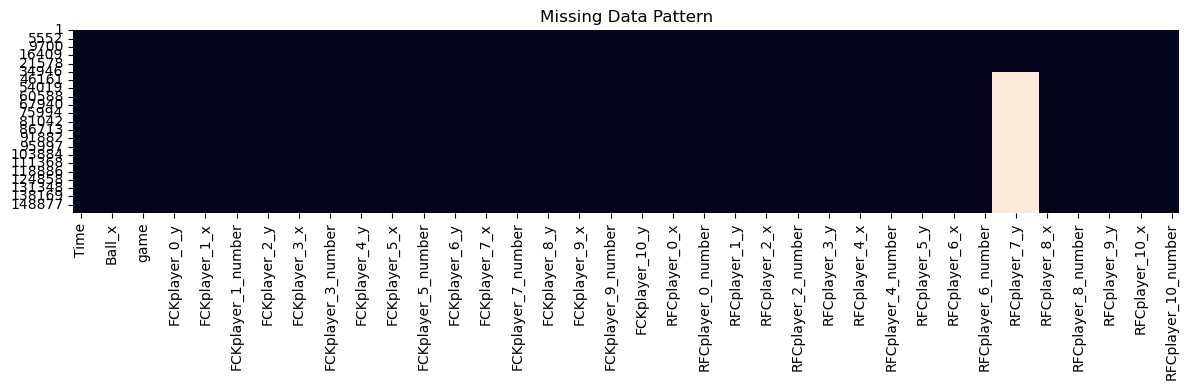

In [2]:
#importing libraries
from data_loader import FootballDataLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU


In [3]:
#Processing the data
data_dir = r"\Users\kirlo\Documents\Sanvi University Work\Year 3\AML\final project\FootballData\RestructuredData_2425"  # replace with your actual data directory
team = "FCK"         
data_retriever = FootballDataLoader(data_dir, team)
all_games = data_retriever.load_all_games()
data_loader = all_games[0]

Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 6)
Team shape: (155541, 55)
Opponent shape: (155541, 55)
Total shape: (88002, 118)


In [4]:
data_loader.head()
data_loader.shape

(88002, 118)

In [5]:
#Preparing the model for the RNN
n_time_steps = data_loader.shape[0]
positions = data_loader[['FCKplayer_0_x', 'FCKplayer_0_y']].values 

#we need a 3D array for the RNN, using the time, x, and y dimensions
X = []
y = []

for i in range(n_time_steps - 1):
    X.append(positions[i])
    y.append(positions[i + 1])
X = np.array(X)
y = np.array(y)

#Reshaping with the sliding window method
window_size = 5 #we should probably make this bigger, doubt anything useful will happen in 0.2 seconds
X_reshaped = []
y_reshaped = []
for i in range(len(X) - window_size):
    X_reshaped.append(X[i:i + window_size])
    y_reshaped.append(y[i + window_size])
X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)
X_reshaped.shape, y_reshaped.shape

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70396, 5, 2), (17600, 5, 2), (70396, 2), (17600, 2))

In [6]:
#Creating a simple RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(2, activation='linear'))  # I guessed this for now. When the code works change it for a more suitable activation function

model.compile(optimizer='adam', loss='mse', metrics=['mae']) #Same thing as above
model.summary()

c:\Users\kirlo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 5, 64)          │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,674 (49.51 KB)

 Trainable params: 12,674 (49.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 113.5307 - mae: 5.9091 - val_loss: 1.1795 - val_mae: 0.3946
Epoch 2/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7170 - mae: 0.3294 - val_loss: 0.2495 - val_mae: 0.2304
Epoch 3/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2276 - mae: 0.1897 - val_loss: 0.1524 - val_mae: 0.2034
Epoch 4/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1686 - mae: 0.1687 - val_loss: 0.1503 - val_mae: 0.2065
Epoch 5/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1809 - mae: 0.1711 - val_loss: 0.1474 - val_mae: 0.1793
Epoch 6/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1777 - mae: 0.1644 - val_loss: 0.1459 - val_mae: 0.1995
Epoch 7/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1529 - mae: 0.1566 - val_loss: 0.1721 - val_mae: 0.1850
Epoch 8/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1807 - mae: 0.1634 - val_loss: 0.1208 - val_mae: 0.1434
Epoch 9/10
1760/1760 ━━━━━━━━━━━━━━━━━

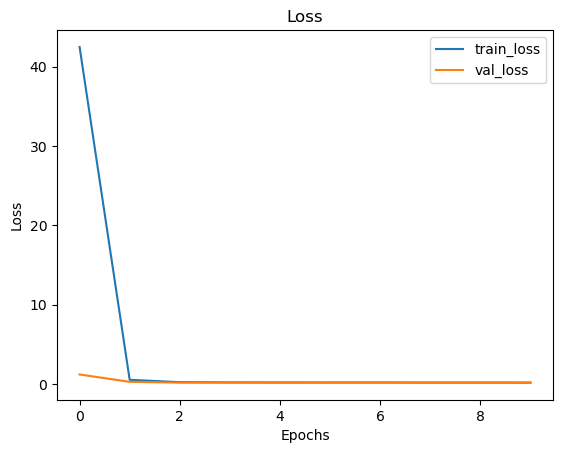

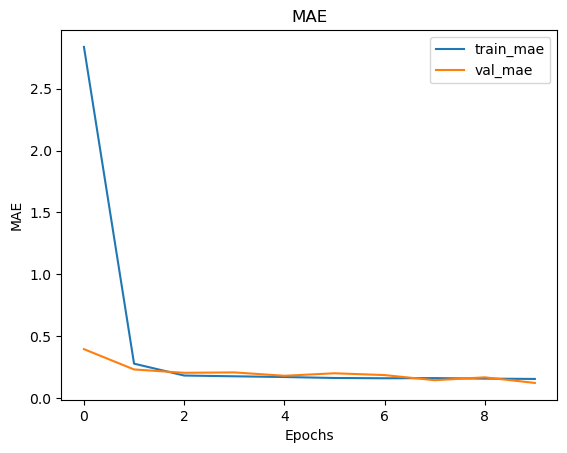

In [7]:
#Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
#Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
#Plotting the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting mae
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 64)          │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,306 (196.51 KB)

 Trainable params: 50,306 (196.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 102.4502 - mae: 5.6226 - val_loss: 1.2454 - val_mae: 0.5836
Epoch 2/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.7140 - mae: 0.3488 - val_loss: 0.2270 - val_mae: 0.1927
Epoch 3/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.2474 - mae: 0.2043 - val_loss: 0.1328 - val_mae: 0.1228
Epoch 4/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.2087 - mae: 0.1741 - val_loss: 0.1112 - val_mae: 0.0929
Epoch 5/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1650 - mae: 0.1542 - val_loss: 0.1399 - val_mae: 0.1689
Epoch 6/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1616 - mae: 0.1588 - val_loss: 0.1011 - val_mae: 0.0883
Epoch 7/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1752 - mae: 0.1458 - val_loss: 0.1010 - val_mae: 0.0873
Epoch 8/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1639 - mae: 0.1394 - val_loss: 0.1245 - val_mae: 0.1379
Epoch 9/10
1760/1760 ━━━━━━━━━

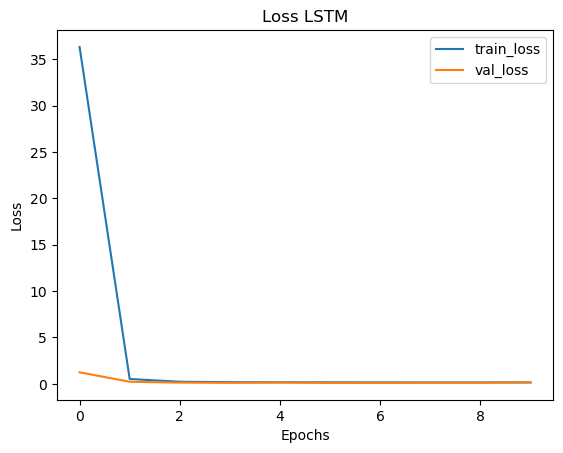

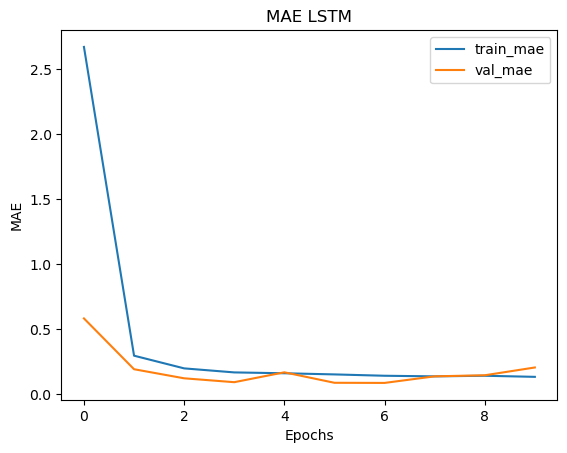

In [8]:
#Now ill see if i can do this with LSTM and GRU
#Starting with LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(2, activation='linear'))  # I guessed this for now. When the code works change it for a more suitable activation function
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae']) #Same thing as above
model_lstm.summary()
#Training the model
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
#Evaluating the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss LSTM: {loss_lstm}")
print(f"Test Accuracy LSTM: {accuracy_lstm}")
#Plotting the training history
plt.plot(history_lstm.history['loss'], label='train_loss')
plt.plot(history_lstm.history['val_loss'], label='val_loss')
plt.title('Loss LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting mae
plt.plot(history_lstm.history['mae'], label='train_mae')
plt.plot(history_lstm.history['val_mae'], label='val_mae')
plt.title('MAE LSTM')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()



In [9]:
#Lets just compare the values of the mae for both models here
mae_rnn = history.history['mae'][-1]
print(f'The mae for the simple RNN is: {mae_rnn}')
mae_lstm = history_lstm.history['mae'][-1]
print(f'The mae for the LSTM is: {mae_lstm}')


The mae for the simple RNN is: 0.153694286942482
The mae for the LSTM is: 0.1340009570121765


c:\Users\kirlo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 5, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,146 (149.01 KB)

 Trainable params: 38,146 (149.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 110.6178 - mae: 5.8523 - val_loss: 1.1003 - val_mae: 0.4355
Epoch 2/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.7070 - mae: 0.3241 - val_loss: 0.1982 - val_mae: 0.1602
Epoch 3/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.2141 - mae: 0.1758 - val_loss: 0.1574 - val_mae: 0.2135
Epoch 4/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1874 - mae: 0.1596 - val_loss: 0.1091 - val_mae: 0.1077
Epoch 5/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1524 - mae: 0.1453 - val_loss: 0.1885 - val_mae: 0.2894
Epoch 6/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1524 - mae: 0.1459 - val_loss: 0.1181 - val_mae: 0.1433
Epoch 7/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1489 - mae: 0.1372 - val_loss: 0.1618 - val_mae: 0.2225
Epoch 8/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1530 - mae: 0.1378 - val_loss: 0.1096 - val_mae: 0.1179
Epoch 9/10
1760/1760 ━━━━━━━━━

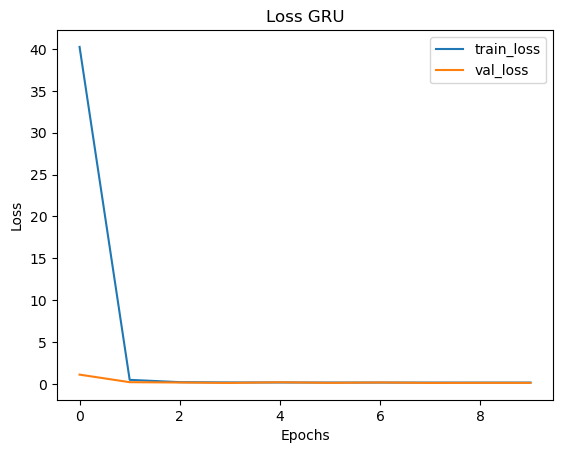

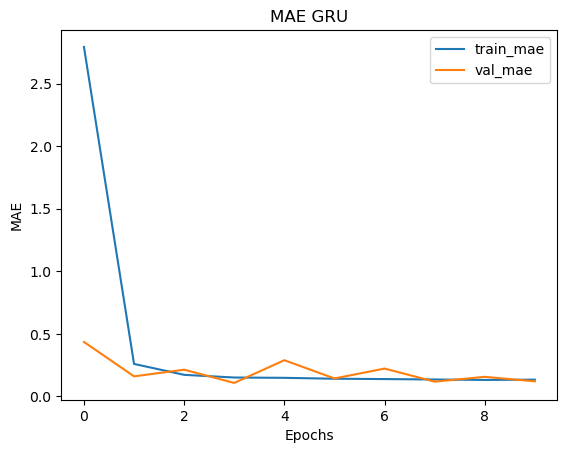

The mae for the simple RNN is: 0.153694286942482
The mae for the LSTM is: 0.1340009570121765
The mae for the GRU is: 0.13374297320842743


In [10]:
#Now we try the GRU
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_gru.add(GRU(64))
model_gru.add(Dense(2, activation='linear'))  # I guessed this for now. When the code works change it for a more suitable activation function
model_gru.compile(optimizer='adam', loss='mse', metrics=['mae']) #Same thing as above
model_gru.summary()
#Training the model
history_gru = model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
#Evaluating the model
loss_gru, accuracy_gru = model_gru.evaluate(X_test, y_test)
print(f"Test Loss GRU: {loss_gru}")
print(f"Test Accuracy GRU: {accuracy_gru}")
#Plotting the training history
plt.plot(history_gru.history['loss'], label='train_loss')
plt.plot(history_gru.history['val_loss'], label='val_loss')
plt.title('Loss GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Plotting mae
plt.plot(history_gru.history['mae'], label='train_mae')
plt.plot(history_gru.history['val_mae'], label='val_mae')
plt.title('MAE GRU')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

#Once again we compare the values of the mae for all models here
mae_rnn = history.history['mae'][-1]
print(f'The mae for the simple RNN is: {mae_rnn}')
mae_lstm = history_lstm.history['mae'][-1]
print(f'The mae for the LSTM is: {mae_lstm}')
mae_gru = history_gru.history['mae'][-1]
print(f'The mae for the GRU is: {mae_gru}')
